### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

## Problems

Use the prompts below to get started with your data analysis.  

### 1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
data.shape # Show the amount of rows and columns

(12684, 26)

### 2. Investigate the dataset for missing or problematic data.

In [13]:
missing_counts = data.isnull().sum().sort_values() # Find columns that have missing data and by how much

print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [14]:
data.duplicated().sum() # Total duplicate rows

74

In [15]:
identical_rows = data[data.duplicated(keep=False)]  # Get all duplicate rows
print(identical_rows.groupby(identical_rows.columns.tolist()).size())  # Count identical duplicates

# Output is an empty series, meaning there are no fully identical duplicates across all columns

Series([], dtype: int64)


In [16]:
print(data['car'].value_counts(dropna=False))  # Includes NaN counts

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64


In [17]:
print(data['CoffeeHouse'].value_counts(dropna=False))  # Includes NaN counts

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64


In [18]:
print(data['Restaurant20To50'].value_counts(dropna=False))  # Includes NaN counts

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64


In [19]:
print(data['CarryAway'].value_counts(dropna=False))  # Includes NaN counts

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64


In [20]:
print(data['RestaurantLessThan20'].value_counts(dropna=False))  # Includes NaN counts

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64


In [21]:
print(data['Bar'].value_counts(dropna=False))  # Includes NaN counts

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64


In [22]:
missing_percentage = data['car'].isnull().sum() / len(data) * 100
print(f"Missing data in 'car': {missing_percentage:.2f}%")

missing_percentage = data['CoffeeHouse'].isnull().sum() / len(data) * 100
print(f"Missing data in 'CoffeeHouse': {missing_percentage:.2f}%")

missing_percentage = data['Restaurant20To50'].isnull().sum() / len(data) * 100
print(f"Missing data in 'Restaurant20To50': {missing_percentage:.2f}%")

missing_percentage = data['CarryAway'].isnull().sum() / len(data) * 100
print(f"Missing data in 'CarryAway': {missing_percentage:.2f}%")

missing_percentage = data['RestaurantLessThan20'].isnull().sum() / len(data) * 100
print(f"Missing data in 'RestaurantLessThan20': {missing_percentage:.2f}%")

missing_percentage = data['Bar'].isnull().sum() / len(data) * 100
print(f"Missing data in 'Bar': {missing_percentage:.2f}%")

Missing data in 'car': 99.15%
Missing data in 'CoffeeHouse': 1.71%
Missing data in 'Restaurant20To50': 1.49%
Missing data in 'CarryAway': 1.19%
Missing data in 'RestaurantLessThan20': 1.02%
Missing data in 'Bar': 0.84%


### 3. Decide what to do about your missing data -- drop, replace, other...

In [24]:
data.drop(columns=['car'], inplace=True) # Drop the car column as the majority (99%) of values are missing

# Fill categorical columns with their mode (most frequent value)
for col in ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [25]:
data.shape # Make sure the car column is dropped. The second number should be 25 instead of 26

(12684, 25)

In [26]:
print(data.isnull().sum())  # Ensure no missing values remain

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


### 4. What proportion of the total observations chose to accept the coupon?



#### Insights:
- **43.16% of coupons were accepted, while 56.84% were rejected**, showing that a majority of drivers chose not to use the offered coupons.
- The **acceptance rate suggests that coupons may not be universally appealing**, reinforcing the need for **targeted marketing strategies** to improve conversion.



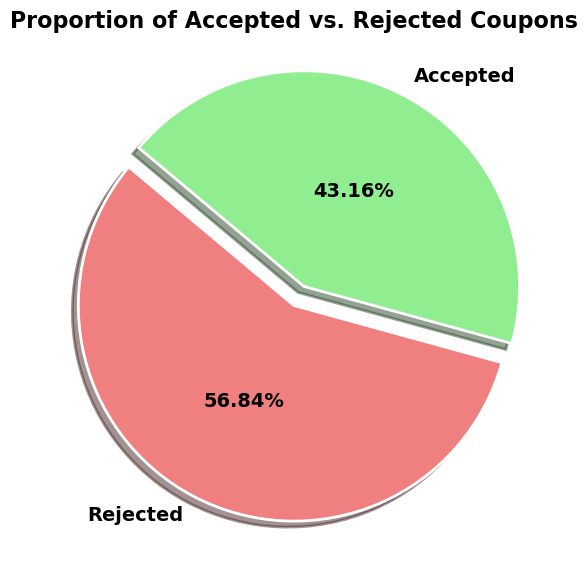

In [29]:
# Count occurrences of each response (0 = not accepted, 1 = accepted)
coupon_acceptance_counts = data['Y'].value_counts(normalize=True)

# Labels and colors for the pie chart
labels = ['Rejected', 'Accepted']
colors = ['lightcoral', 'lightgreen']  # Colors for clarity
explode = (0, 0.1)  # Slightly explode the 'Accepted' slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))  # Slightly larger for better visibility
wedges, texts, autotexts = plt.pie(
    coupon_acceptance_counts,
    labels=labels,
    autopct='%.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14, 'color': 'black', 'weight': 'bold'},  # Improved readability
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # White border for better contrast
    pctdistance=0.5  # Moves percentage labels inward for better placement
)

# Title with bigger, bolder text
plt.title("Proportion of Accepted vs. Rejected Coupons", fontsize=16, fontweight="bold")

# Show plot
plt.show()


### 5. Use a bar plot to visualize the `coupon` column.

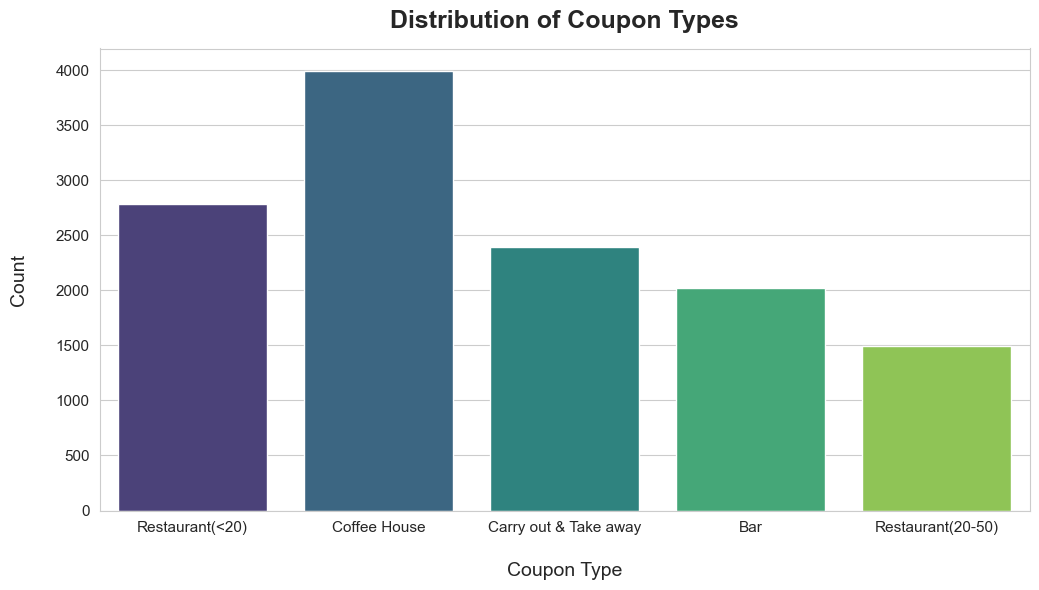

In [31]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
sns.countplot(x=data['coupon'], palette="viridis")

# Customize plot
plt.xlabel("Coupon Type", fontsize=14, labelpad=20)  # Increase font size and add space
plt.ylabel("Count", fontsize=14, labelpad=20)  # Increase font size and add space
plt.title("Distribution of Coupon Types", fontsize=18, fontweight="bold", pad=15)  # Bigger & bolder title with more space
plt.xticks(fontsize=11)  # Increase x-axis labels font size
plt.yticks(fontsize=11)  # Increase y-axis label font size

# Show the plot
plt.show()

### 6. Use a histogram to visualize the temperature column.

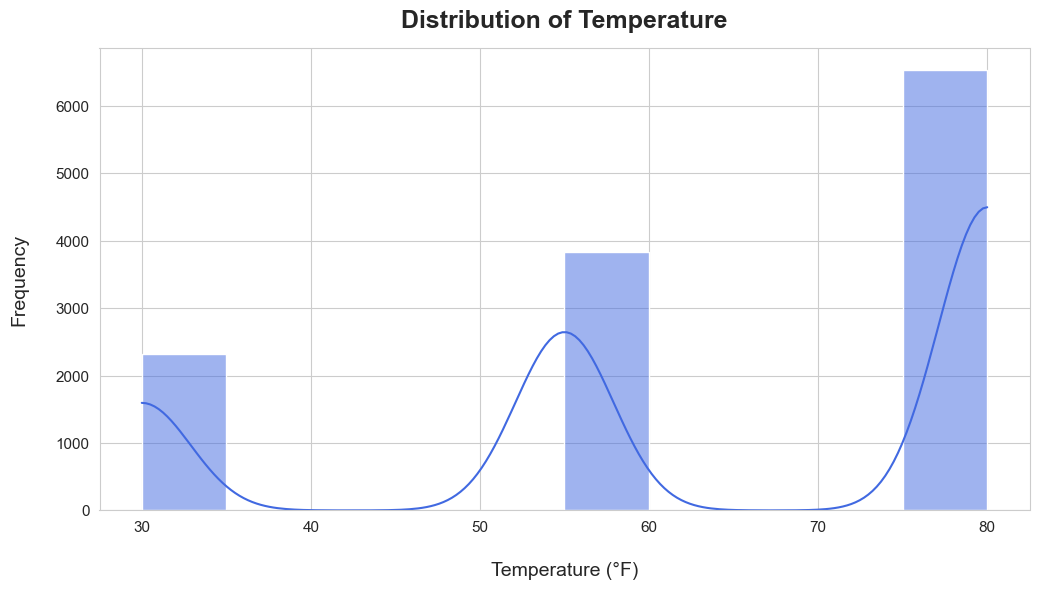

In [33]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the histogram
sns.histplot(data['temperature'], bins=10, kde=True, color="royalblue")

# Customize labels and title
plt.xlabel("Temperature (°F)", fontsize=14, labelpad=20)
plt.ylabel("Frequency", fontsize=14, labelpad=20)
plt.title("Distribution of Temperature", fontsize=18, fontweight="bold", pad=15)
plt.xticks(fontsize=11)  # Increase x-axis labels font size
plt.yticks(fontsize=11)  # Increase y-axis label font size

# Show the plot
plt.show()

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [35]:
# Create a new DataFrame that only contains bar-related coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

### 2. What proportion of bar coupons were accepted?


#### Insights:
- **41% of bar coupons were accepted**, while **59% were rejected**, indicating that a majority of drivers do not find these coupons appealing.
- The acceptance rate suggests that bar coupons may not be universally effective and **targeting the right audience is crucial** for better conversion.


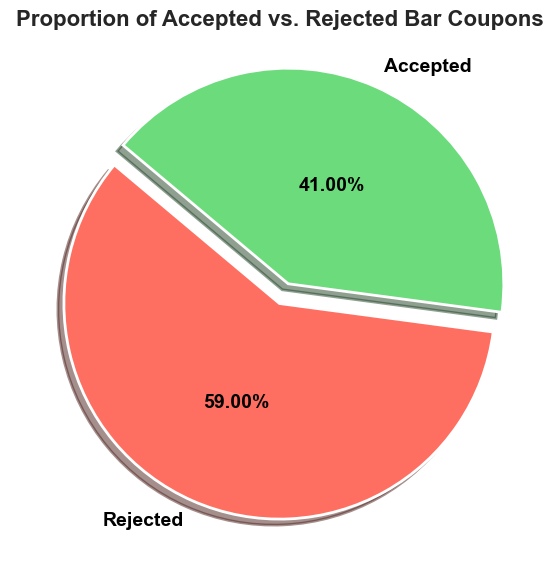

In [38]:
# Count accepted and rejected coupons
bar_acceptance_counts = bar_coupons_df['Y'].value_counts(normalize=True)

# Labels for the pie chart
labels = ['Rejected', 'Accepted']
colors = ['#FF6F61', '#6BDB7C']  # Different colors for clarity
explode = (0, 0.1)  # Slightly explode the 'Accepted' slice

# Create the pie chart
plt.figure(figsize=(7, 7))  # Slightly larger for better visibility
wedges, texts, autotexts = plt.pie(
    bar_acceptance_counts,
    labels=labels,
    autopct='%.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14, 'color': 'black', 'weight': 'bold'},  # Improved readability
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # White border for better contrast
    pctdistance=.5  # Moves percentage labels inward for better placement
)

# Title with bigger, bolder text
plt.title("Proportion of Accepted vs. Rejected Bar Coupons", fontsize=16, fontweight="bold")

# Show plot
plt.show()


### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


#### Insights:
- **Frequent bar-goers (>3 visits/month) are significantly more likely to accept bar coupons (76.88%)** compared to those who visit bars 3 or fewer times per month (52.74%).
- This suggests that **bar promotions are more effective when targeting frequent bar visitors**, as they have a higher likelihood of using the coupons.
- **Occasional bar-goers (≤3 visits/month) still show moderate acceptance (52.74%)**, indicating that while they are less responsive than frequent visitors, they are not entirely uninterested.
- **Marketing efforts should focus on high-frequency bar visitors**, potentially offering personalized or loyalty-based incentives to maximize engagement.



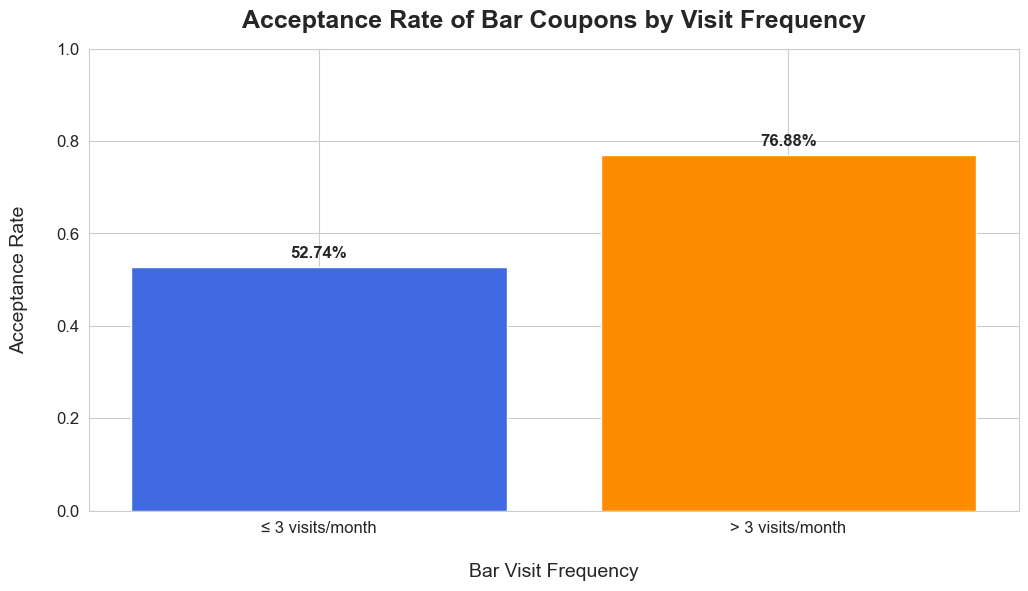

In [41]:
# Create two groups
low_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(["less1", "1~3"])] # Excluding "never" as this is to compare those who went to a bar
high_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(["4~8", "gt8"])]

# Calculate the acceptance rate for both groups
low_acceptance_rate = low_bar_visitors['Y'].mean()
high_acceptance_rate = high_bar_visitors['Y'].mean()

# Data for plotting
categories = ["≤ 3 visits/month", "> 3 visits/month"]
rates = [low_acceptance_rate, high_acceptance_rate]

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14,labelpad=20)
plt.xlabel("Bar Visit Frequency", fontsize=14, labelpad=20)
plt.title("Acceptance Rate of Bar Coupons by Visit Frequency", fontsize=18, fontweight="bold", pad=15)
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()



### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


#### Insights:
- Drivers over 25 who go to bars frequently are **much more likely** to accept bar coupons (69.97%) compared to all other drivers (34.86%).
- This suggests that **older, frequent bar-goers may be a key target audience** for bar promotions.


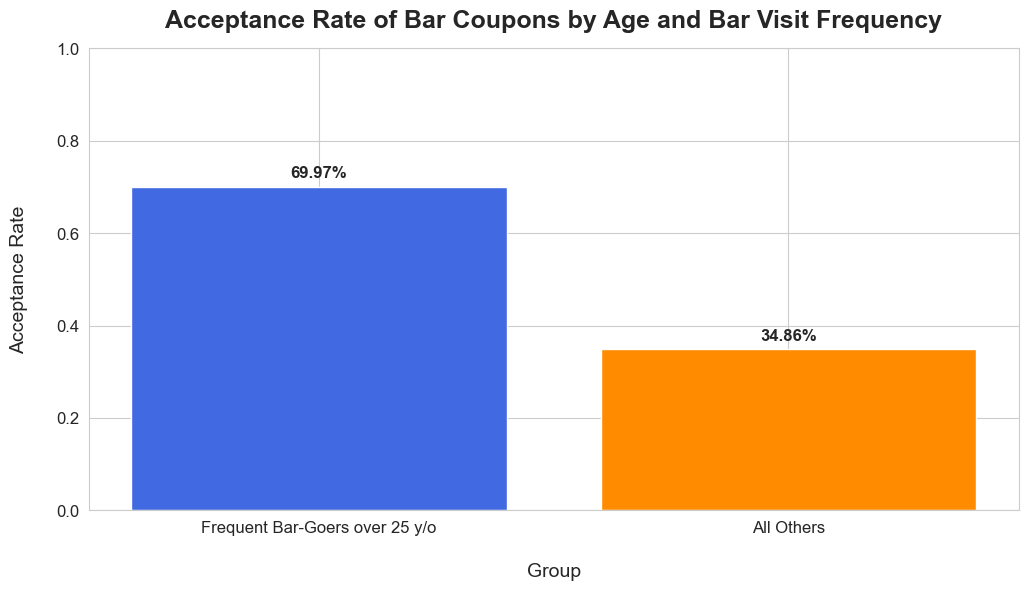

In [44]:
# Ensure we are working with a copy to avoid SettingWithCopyWarning
bar_coupons_df = bar_coupons_df.copy()

# Convert age to numeric
bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Group 1: Frequent bar-goers (more than once a month) AND over 25
frequent_bar_goers_over_25 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['age'] > 25)
]

# Group 2: All other drivers
all_other_drivers = bar_coupons_df[~(
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['age'] > 25)
)]

# Compute acceptance rates
frequent_bar_goers_over_25_acceptance = frequent_bar_goers_over_25['Y'].mean()
all_other_drivers_acceptance = all_other_drivers['Y'].mean()

# Data for plotting
categories = ["Frequent Bar-Goers over 25 y/o", "All Others"]
rates = [frequent_bar_goers_over_25_acceptance, all_other_drivers_acceptance]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14, labelpad=20)
plt.xlabel("Group", fontsize=14, labelpad=20)
plt.title("Acceptance Rate of Bar Coupons by Age and Bar Visit Frequency", fontsize=18, fontweight="bold", pad=15)
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()


### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


### Insights:
- **Drivers who go to bars more than once a month, had a passenger (not a kid), and worked outside farming, fishing, or forestry had a much higher coupon acceptance rate (71.79%)** compared to all other drivers (37.71%).
- The **large gap in acceptance rates (71.79% vs. 37.71%)** indicates that passengers and occupation type may play a role in coupon receptiveness.

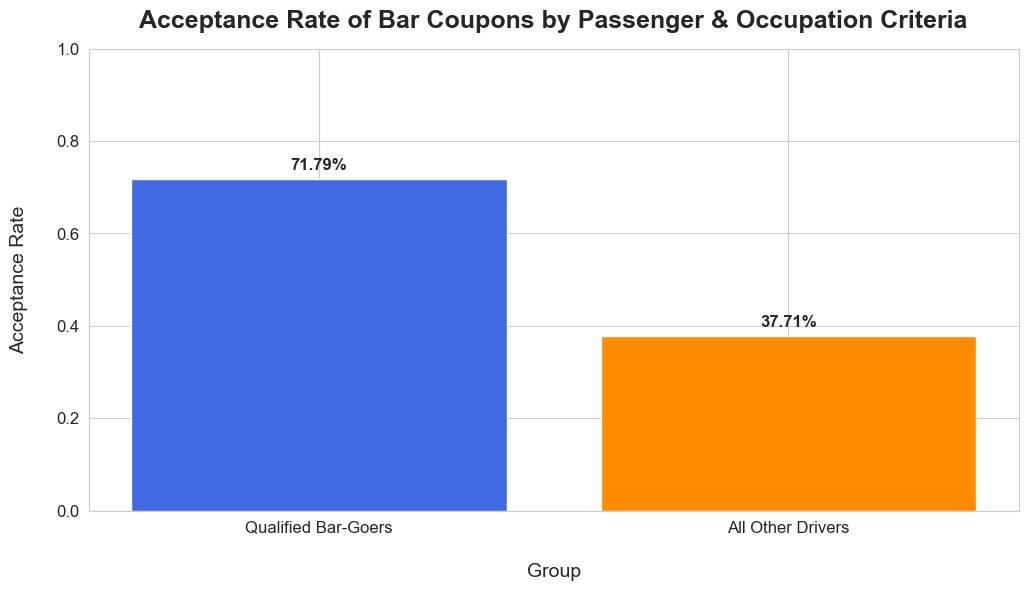

In [47]:
# Group 1: Drivers who go to bars more than once a month, had a passenger (not a kid), and were not in farming, fishing, or forestry
qualified_bar_goers = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['passanger'].isin(["Friend(s)", "Partner"])) &  # Excludes "Alone" and "Kid(s)"
    (bar_coupons_df['occupation'] != "Farming Fishing & Forestry")
]

# Group 2: All other drivers (anyone who does NOT meet all three conditions)
other_drivers = bar_coupons_df[~(
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['passanger'].isin(["Friend(s)", "Partner"])) & 
    (bar_coupons_df['occupation'] != "Farming Fishing & Forestry")
)]

# Calculate acceptance rates
qualified_bar_goers_acceptance = qualified_bar_goers['Y'].mean()
other_drivers_acceptance = other_drivers['Y'].mean()

# Data for plotting
categories = ["Qualified Bar-Goers", "All Other Drivers"]
rates = [qualified_bar_goers_acceptance, other_drivers_acceptance]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14, labelpad=20)
plt.xlabel("Group", fontsize=14, labelpad=20)
plt.title("Acceptance Rate of Bar Coupons by Passenger & Occupation Criteria", fontsize=18, fontweight="bold", pad=15)
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()


### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



#### Insights:
- **Bar-goers under 30 had the highest coupon acceptance rate (73.13%)**, indicating that younger drivers who frequently visit bars are the most likely to redeem bar coupons.
- **Drivers who went to bars more than once a month, had passengers (not kids), and were not widowed had a slightly lower but still high acceptance rate (71.79%)**. This suggests that social bar-goers (those with companions) are a strong target audience for bar promotions.
- **Frequent cheap restaurant visitors with an income below $50K had the lowest coupon acceptance rate (43.84%)**, indicating that lower-income drivers who frequently dine at inexpensive restaurants may be more selective about bar coupon offers.
- **These findings suggest that bar coupons should be primarily marketed toward younger drivers and social bar-goers**, as they show the highest likelihood of redemption.


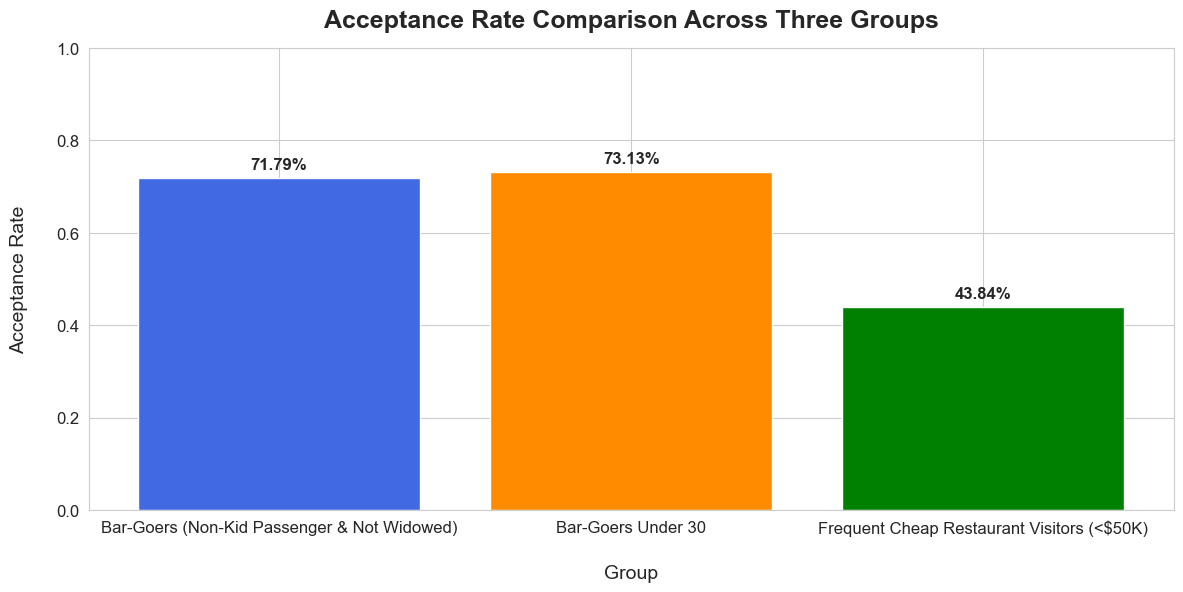

In [50]:
# Group 1: Drivers who go to bars more than once a month, had passengers (not a kid), and were not widowed
group_passenger_not_kid_not_widowed = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['passanger'].isin(["Friend(s)", "Partner"])) & 
    (bar_coupons_df['maritalStatus'] != "Widowed")
]

# Group 2: Drivers who go to bars more than once a month and are under 30
group_under_30 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['age'] < 30)
]

# Group 3: Drivers who go to cheap restaurants more than 4 times a month and have an income below $50K
group_frequent_cheap_restaurants_low_income = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'].isin(["4~8", "gt8"])) & 
    (bar_coupons_df['income'].isin(["Less than $12500", "$12500 – $24999", "$25000 – $37499", "$37500 – $49999"]))
]

# Compute acceptance rates for each group
acceptance_passenger_not_kid_not_widowed = group_passenger_not_kid_not_widowed['Y'].mean()
acceptance_under_30 = group_under_30['Y'].mean()
acceptance_frequent_cheap_restaurants_low_income = group_frequent_cheap_restaurants_low_income['Y'].mean()

# Data for plotting
categories = [
    "Bar-Goers (Non-Kid Passenger & Not Widowed)", 
    "Bar-Goers Under 30", 
    "Frequent Cheap Restaurant Visitors (<$50K)"
]
rates = [
    acceptance_passenger_not_kid_not_widowed, 
    acceptance_under_30, 
    acceptance_frequent_cheap_restaurants_low_income
]

# Create the bar plot
plt.figure(figsize=(14, 6))
plt.bar(categories, rates, color=['royalblue', 'darkorange', 'green'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14, labelpad=20)
plt.xlabel("Group", fontsize=14, labelpad=20)
plt.title("Acceptance Rate Comparison Across Three Groups", fontsize=18, fontweight="bold", pad=15)
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()



### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted **bar coupons** tend to be **frequent bar-goers**, *younger*, **social drinkers**, and *not necessarily* from low-income groups. While **financial constraints** do play a role, those who **regularly visit bars—especially with companions—** are more inclined to take advantage of **bar promotions**. **Occupation** and **lifestyle choices** also influence **coupon acceptance**.


---
### Findings
- Frequent bar-goers are much more likely to accept bar coupons (**76.88%**) than occasional bar-goers (**52.74%**).
- Drivers under 30 have a high acceptance rate (**73.13%**), making them a key target audience.
- Drivers with a passenger (**not a kid**) are more receptive to bar coupons (**71.79%**).
- Low-income frequent restaurant-goers actually have a lower acceptance rate (**43.84%**), suggesting financial caution.



### Next Steps and Recommendations

#### **Marketing Recommendations**
- **Target frequent bar-goers over 25** with mobile bar coupons since they have a high acceptance rate (**69.97%**).
- **Avoid sending bar coupons to drivers with kids in the car**, as they are less likely to accept them.
- **Test different discount amounts** to see if larger discounts increase acceptance among occasional bar-goers (**52.74% acceptance rate**).
- **Leverage social influences** by targeting drivers who frequently go to bars with a **partner or friends** (**71.79% acceptance rate**).

#### **Future Analysis Suggestions**
- **Perform a chi-square test** to confirm whether the observed acceptance rate differences are statistically significant.
- **Analyze the impact of external factors**, such as **weather or time of day**, on coupon acceptance.
- **Investigate crossover behavior**—do bar-goers who accept coupons also accept restaurant or coffee shop coupons?
- **Explore segmentation further** by combining multiple variables (e.g., age + income + frequency) to refine targeting strategies.

---


## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Perform the Chi-Square test

#### Insights:
- A **Chi-Square test was conducted to examine the relationship between coffee house visit frequency and coupon acceptance**.
- The results show a **Chi-Square value of 278.74** with a **p-value of 0.0000**, indicating that the relationship is statistically significant.
- Since **p < 0.05**, we **reject the null hypothesis**, meaning that **coffee house visit frequency significantly impacts the likelihood of accepting a coupon**.
- **Observed vs. Expected Frequencies:**
  - Those who **visit coffee houses frequently (1-3 times/month or more)** **accepted coupons more than expected**.
  - Those who **never visit coffee houses accepted fewer coupons than expected**, suggesting they are less responsive to such promotions.
- **Marketing Implications:**
  - **Frequent coffee house visitors are a prime audience for coupon promotions**, as they are more likely to redeem them.
  - Those who never visit coffee houses **may require different incentives** or marketing approaches to increase engagement.
- **Future Analysis:**
  - Explore **demographic factors (e.g., age, income) in combination with coffee house visits** to refine targeting.


In [58]:
# Create a contingency table
contingency_table = pd.crosstab(data['CoffeeHouse'], data['Y'])

# Show the contingency table
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"\nChi-Square Value: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Show expected frequencies
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
if p < 0.05:
    print("\n✅ There is a significant relationship between Coffee House-going frequency and coupon acceptance.")
else:
    print("\n❌ There is NO significant relationship between Coffee House-going frequency and coupon acceptance.")


Contingency Table:
 Y               0     1
CoffeeHouse            
1~3          1116  2109
4~8           654  1130
gt8           463   648
less1        1641  1961
never        1600  1362

Chi-Square Value: 278.74
P-Value: 0.0000
Degrees of Freedom: 4

Expected Frequencies:
 Y                      0            1
CoffeeHouse                          
1~3          1391.804636  1833.195364
4~8           769.916115  1014.083885
gt8           479.471302   631.528698
less1        1554.505519  2047.494481
never        1278.302428  1683.697572

✅ There is a significant relationship between Coffee House-going frequency and coupon acceptance.


## **Investigating the Coffee House Coupons**

Now, we will explore just the coffee house related coupons.  

### 1. Create a new `DataFrame` that contains just the coffee house coupons.


In [60]:
# Create a new DataFrame that only contains coffee house related coupons
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House']

### 2. How do age and income levels affect the acceptance rate of coffee house coupons among different coffee house visit frequencies?

#### Insights
- **Acceptance rates vary by age group**, with **younger individuals (21-24) having the highest acceptance rate (52.43%)**.
- The **acceptance rate drops for middle-aged groups (30-34: 47.67%, 35-39: 46.77%)**, but slightly increases again for the **oldest group (40-46: 50.15%)**.
- This suggests that **coffee house coupons appeal more to younger demographics and those above 40, while middle-aged groups (30-39) are slightly less likely to redeem them**.

- **Income level also plays a role in coupon acceptance**:
  - Those earning **\$87,500 - \$99,999 (55.72%)** and **Less than \$12,500 (55.19%)** have the highest acceptance rates, suggesting that **lower-income and 2nd to highest income individuals may be more open to coffee house promotions**.
  - **Lower-middle income earners (\$50,000 - \$74,999) have lower acceptance rates (29.66% - 43.64%)**, indicating they may be **more price-conscious and selective** when it comes to redeeming coupons.
  - The acceptance rate for the **lowest income group (Less than \$12,500) is 55.19%**, showing that **coupon usage is still relatively strong in this segment**, possibly due to cost-saving behaviors.
  - Interestingly, **some middle-income groups (\$37,500 - \$49,999: 54.24%) have similar acceptance rates to lower-income groups and 2nd highest income**, suggesting that **income is not the sole determining factor** in coupon acceptance.  


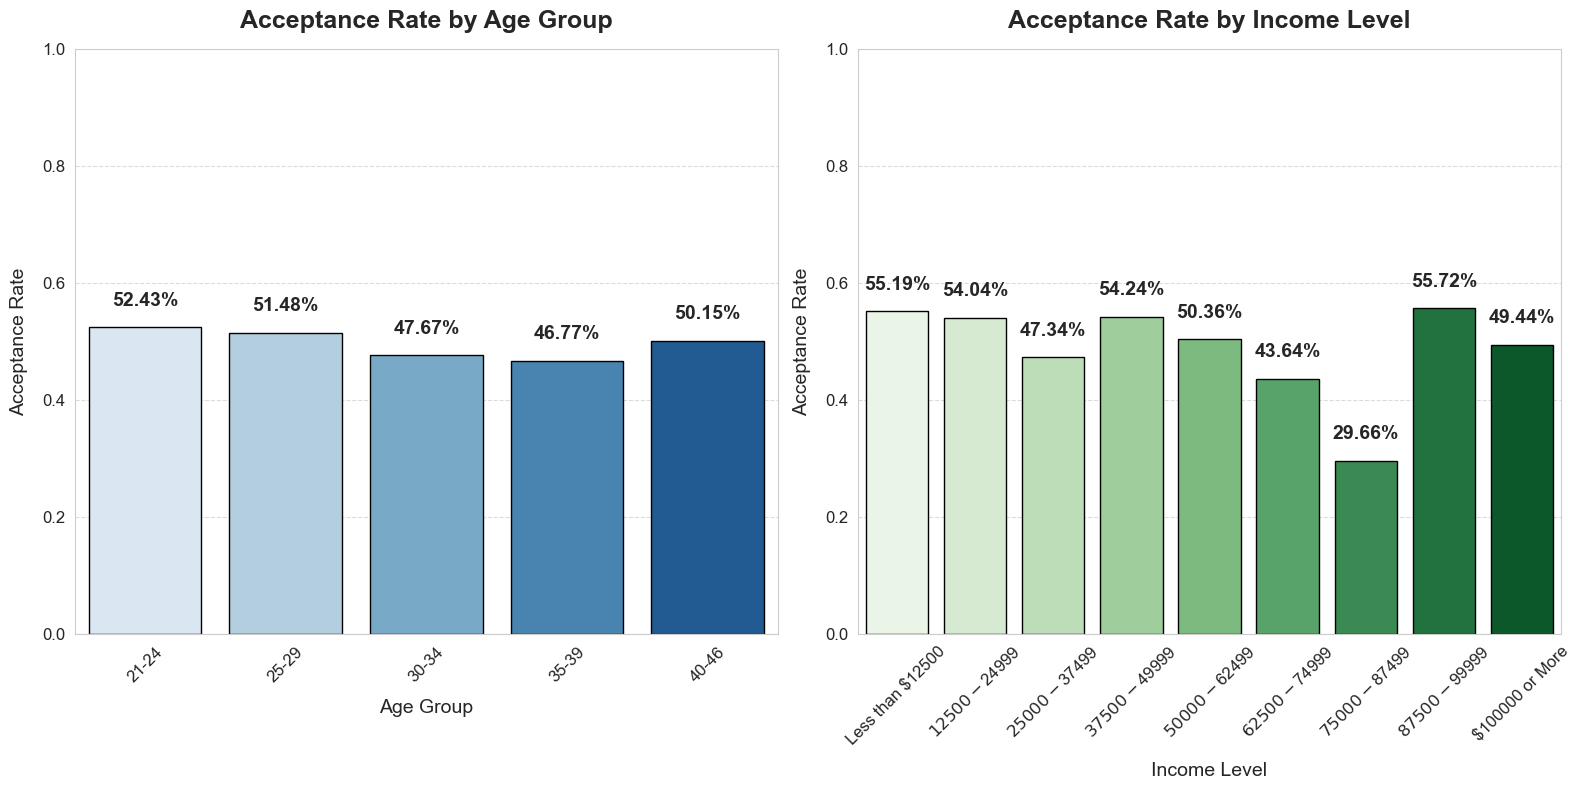

In [63]:
# Create a copy of the DataFrame to avoid modifying the original
coffee_house_coupons_df = data[data['coupon'] == 'Coffee House'].copy()

# Ensure 'age' column is numeric
coffee_house_coupons_df.loc[:, 'age'] = pd.to_numeric(coffee_house_coupons_df['age'], errors='coerce')

# Define age groups
age_bins = [21, 25, 30, 35, 40, 46]  # Defined based on quartiles and natural age brackets
age_labels = ['21-24', '25-29', '30-34', '35-39', '40-46']  # Matching bin ranges
coffee_house_coupons_df.loc[:, 'age_group'] = pd.cut(
    coffee_house_coupons_df['age'], bins=age_bins, labels=age_labels, right=False
)

# Define income order manually (ensures correct order)
income_order = [
    'Less than $12500', 
    '$12500 - $24999', 
    '$25000 - $37499', 
    '$37500 - $49999', 
    '$50000 - $62499', 
    '$62500 - $74999', 
    '$75000 - $87499', 
    '$87500 - $99999', 
    '$100000 or More'
]

# Calculate acceptance rates by age group
age_acceptance = coffee_house_coupons_df.groupby('age_group')['Y'].mean().reset_index()

# Calculate acceptance rates by income level and **ensure correct order**
income_acceptance = coffee_house_coupons_df.groupby('income')['Y'].mean().reset_index()
income_acceptance['income'] = pd.Categorical(income_acceptance['income'], categories=income_order, ordered=True)
income_acceptance = income_acceptance.sort_values('income')  # Sorting ensures correct order

# Drop NaN values to avoid plotting issues
age_acceptance.dropna(inplace=True)
income_acceptance.dropna(inplace=True)

# Create subplots with larger figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Age group acceptance rate plot
sns.barplot(x='age_group', y='Y', data=age_acceptance, ax=axes[0], palette='Blues', edgecolor='black')
axes[0].set_title("Acceptance Rate by Age Group", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Age Group", fontsize=14, labelpad=10)
axes[0].set_ylabel("Acceptance Rate", fontsize=14, labelpad=10)
axes[0].set_ylim(0, 1)  # Scale from 0 to 100%
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels slightly above bars
for i, rate in enumerate(age_acceptance['Y']):
    axes[0].text(i, rate + 0.03, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold", va='bottom')

# Income level acceptance rate plot (ensuring correct order)
sns.barplot(x='income', y='Y', data=income_acceptance, ax=axes[1], palette='Greens', edgecolor='black', order=income_order)
axes[1].set_title("Acceptance Rate by Income Level", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Income Level", fontsize=14, labelpad=10)
axes[1].set_ylabel("Acceptance Rate", fontsize=14, labelpad=10)
axes[1].set_ylim(0, 1)  # Scale from 0 to 100%
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels slightly above bars
for i, rate in enumerate(income_acceptance['Y']):
    axes[1].text(i, rate + 0.03, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold", va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


### 3. Does gender impact coupon acceptance?

### Insights:
- **Acceptance rates by gender are nearly equal**, with **males (50.64%) having a slightly higher acceptance rate than females (49.24%)**.
- The **difference of only 1.4 percentage points** suggests that **gender is not a major factor** in coffee house coupon acceptance.
- This indicates that **marketing strategies should not heavily differentiate based on gender**, as both groups exhibit similar coupon usage behavior.
- **Other factors such as income, age, or coffee house visit frequency may have a stronger influence** on coupon acceptance.


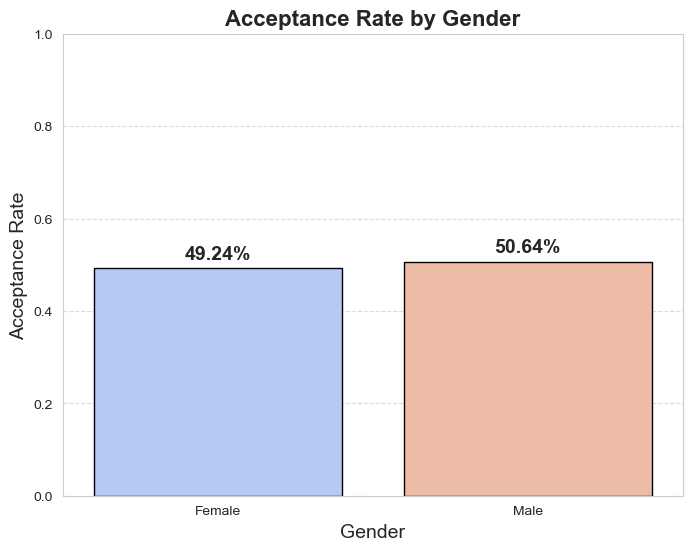

In [66]:
# Calculate acceptance rates by gender
gender_acceptance = coffee_house_coupons_df.groupby('gender')['Y'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='Y', data=gender_acceptance, palette='coolwarm', edgecolor='black')
plt.title("Acceptance Rate by Gender", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Acceptance Rate", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, rate in enumerate(gender_acceptance['Y']):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold")

plt.show()


### 4. Does marital status affect coupon acceptance?

### Insights:
- **Divorced individuals (52.32%) and single individuals (51.61%) have the highest acceptance rates**, indicating that these groups may be more open to redeeming coffee house coupons.
- **Married partners (49.32%) and unmarried partners (47.84%) show slightly lower acceptance rates**, suggesting that individuals in relationships may have different spending behaviors or priorities.
- **Widowed individuals have the lowest acceptance rate (35.14%)**, which could indicate that this group is less likely to engage with promotional offers or may have different consumption habits.


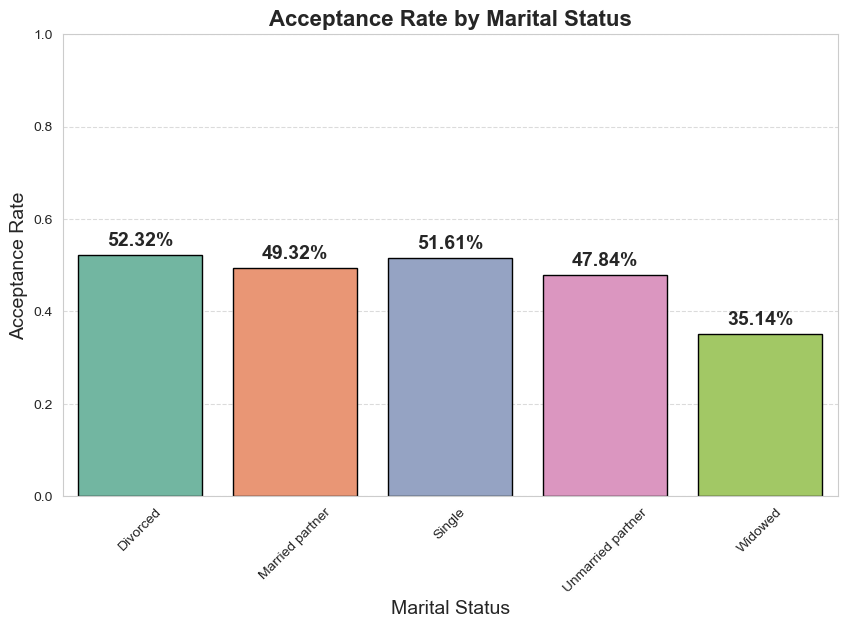

In [69]:
# Calculate acceptance rates by marital status
marital_acceptance = coffee_house_coupons_df.groupby('maritalStatus')['Y'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='maritalStatus', y='Y', data=marital_acceptance, palette='Set2', edgecolor='black')
plt.title("Acceptance Rate by Marital Status", fontsize=16, fontweight="bold")
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Acceptance Rate", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, rate in enumerate(marital_acceptance['Y']):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold")

plt.show()


### 5. How does occupation impact coupon acceptance?

### Insights:
- **Occupation significantly impacts coupon acceptance**, with notable differences across job categories.
- **Healthcare Practitioners & Technical (74.32%) and Building & Grounds Cleaning & Maintenance (72.73%) have the highest acceptance rates**, suggesting that individuals in these roles may be more receptive to promotions, possibly due to frequent small purchases or cost-saving behaviors.
- **Students (62.53%) and those in Transportation & Material Moving (61.84%) also have high acceptance rates**, indicating that financial considerations or lifestyle factors may influence coupon redemption.
- **Unemployed individuals (54.21%) also demonstrate above-average acceptance rates**, potentially due to budget-conscious spending habits.
- **Production Occupations (35.71%) and Community & Social Services (35.14%) have among the lowest acceptance rates**, suggesting that individuals in these occupations may be less inclined to use promotional offers, possibly due to different spending priorities or work schedules.



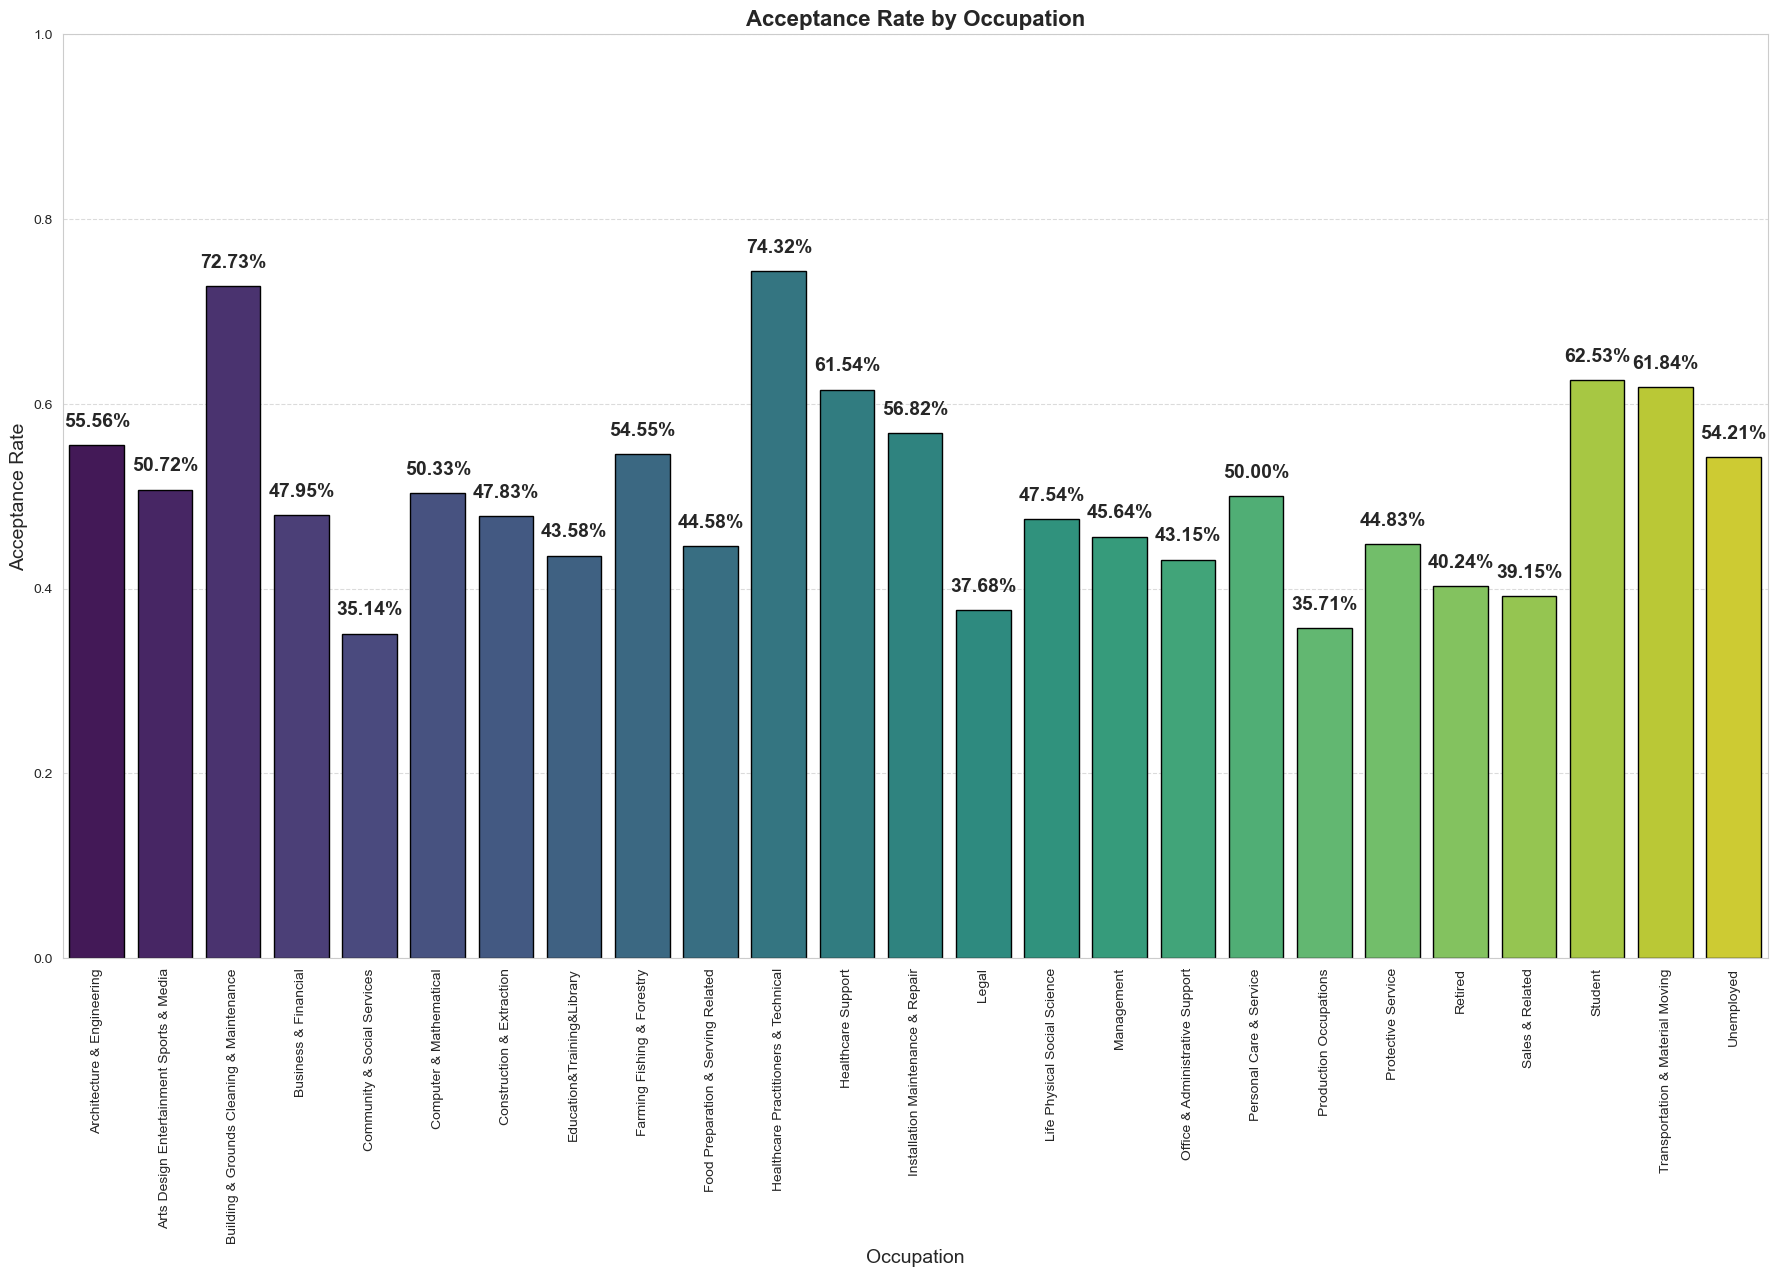

In [72]:
# Calculate acceptance rates by occupation
occupation_acceptance = coffee_house_coupons_df.groupby('occupation')['Y'].mean().reset_index()

# Plot
plt.figure(figsize=(22, 12))
sns.barplot(x='occupation', y='Y', data=occupation_acceptance, palette='viridis', edgecolor='black')
plt.title("Acceptance Rate by Occupation", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Acceptance Rate", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, rate in enumerate(occupation_acceptance['Y']):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold")

plt.show()


### 6. Do passengers influence acceptance?

### Insights:
- **Passenger type influences coupon acceptance**, with individuals traveling with others being more likely to redeem coffee house coupons.
- **Drivers with friends have the highest acceptance rate (59.69%)**, suggesting that social outings may encourage coupon use.
- **Drivers with a partner also show a high acceptance rate (57.05%)**, indicating that couples may be more likely to use coupons for shared experiences.
- **Drivers traveling alone have the lowest acceptance rate (43.79%)**, suggesting that solo commuters may be less inclined to use coupons, possibly due to less motivation to make impulse purchases.
- **Those traveling with kids have a moderate acceptance rate (48.31%)**, which could indicate that parents are somewhat cautious about spending but may still use coupons when convenient.

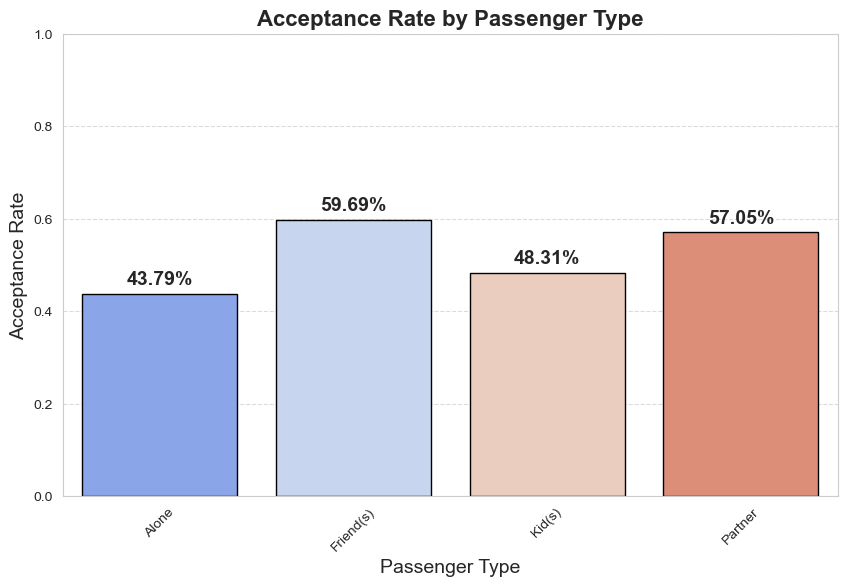

In [75]:
# Calculate acceptance rates by passenger type
passenger_acceptance = coffee_house_coupons_df.groupby('passanger')['Y'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='passanger', y='Y', data=passenger_acceptance, palette='coolwarm', edgecolor='black')
plt.title("Acceptance Rate by Passenger Type", fontsize=16, fontweight="bold")
plt.xlabel("Passenger Type", fontsize=14)
plt.ylabel("Acceptance Rate", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, rate in enumerate(passenger_acceptance['Y']):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=14, fontweight="bold")

plt.show()


### 7. Hypothesis on Drivers Who Accepted Coffee House Coupons

Drivers who accepted coffee house coupons tend to be **frequent coffee shop visitors, younger individuals, and social consumers**. While financial constraints play a role, those who regularly visit coffee houses—especially with companions—are more inclined to take advantage of coffee house promotions. **Income, occupation, and lifestyle choices also influence coupon acceptance.**

---

## **Findings**
- **Frequent coffee house visitors are more likely to accept coupons**, as **those who visit 1-3 times per month or more show higher acceptance rates**.
- **Younger individuals (21-24) have the highest acceptance rate (52.43%)**, making them a key target audience.
- **Gender does not significantly impact coupon acceptance**, as **both males (50.64%) and females (49.24%) have similar acceptance rates**.
- **Drivers traveling with a passenger (friends or a partner) have higher acceptance rates (59.69% and 57.05%)**, indicating that **social settings encourage coupon redemption**.
- **Occupation influences coupon acceptance significantly**:
  - **Healthcare Practitioners & Technical (74.32%) and Building & Grounds Cleaning & Maintenance (72.73%)** have the highest acceptance rates, suggesting these workers may be **more receptive to promotions, possibly due to frequent small purchases**.
  - **Production Occupations (35.71%) and Community & Social Services (35.14%) have the lowest acceptance rates**, indicating that professionals in these fields may be **less likely to engage with promotional offers**.
- **Income level plays a role in coupon acceptance**:
  - **Middle to high-income earners (\$87,500 - \$99,999: 55.72% and Less than \$12,500: 55.19%)** have the highest acceptance rates, suggesting they may be more open to **coffee house promotions**.
  - **Lower-middle income earners (\$62,500 - \$87,499) have lower acceptance rates (29.66% - 43.64%)**, indicating they may be more price-conscious.
  - **The lowest income group (Less than \$12,500) still has a relatively strong acceptance rate (55.19%)**, showing that cost-saving behaviors influence coupon use.

---

## **Next Steps and Recommendations**
### **Marketing Recommendations**
- **Target frequent coffee house visitors and younger individuals (21-24)** with **mobile coffee coupons**, as they have the highest acceptance rates.
- **Avoid targeting coffee house coupons solely based on gender**, as acceptance rates are nearly identical.
- **Promote coffee house coupons to those who visit coffee shops with friends or partners**, as they are more likely to redeem them.
- **Tailor marketing campaigns for occupations with high acceptance rates** (e.g., healthcare workers, service workers, students) by **offering loyalty-based rewards**.
- **Test different discount amounts to see if larger discounts increase acceptance among middle-income earners ($62,500 - $87,499)**, who show **lower acceptance rates**.

### **Future Analysis Suggestions**
- **Analyze the impact of external factors (e.g., time of day, weekday vs. weekend) on coffee house coupon acceptance**.
- **Investigate crossover behavior**—do **coffee house coupon users also accept restaurant or bar coupons?**

---